In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import cov
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import scipy.stats as stats
from scipy.stats import chi2,ttest_ind

The "UsedCarsData" is an Automobile Industry data,which aspires to enter the Used-car market
by setting up their company locally to give competition to their counterparts.They want to 
understand the factors affecting the pricing of cars in the market, since those may be very
different from the new car market.Therefore, to analyse the competition and pricing of the 
rest of the market i have tried to represent the dataset statstically and have made graphical 
representation wherever necessary so that it would be easy to understand.

In [2]:
df=pd.read_csv('UsedCarsData.csv')
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


To check the unique values of features in the dataset,so that we dont get any incorrect data:

In [3]:
df['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [4]:
df['Region'].unique()

array(['East', 'Central', 'West', 'South'], dtype=object)

In [5]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [7]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df.shape

(7906, 18)

In [13]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [14]:
df.loc[df.duplicated()]

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold


# Task 1.1(Data Manipulation using Python)

a.Which brands are selling most?

In [15]:
sell_brand=df[df['sold']=='Y']['name'].value_counts()
sell_brand

Maruti Swift Dzire VDI                    42
Maruti Alto 800 LXI                       21
BMW X4 M Sport X xDrive20d                19
Maruti Wagon R VXI BS IV                  16
Maruti Wagon R LXI                        15
                                          ..
Hyundai i20 1.4 CRDi Era                   1
Mahindra Xylo D4 BSIV                      1
Honda Amaze i-VTEC Privilege Edition       1
Mahindra Scorpio S2 7 Seater               1
Mahindra TUV 300 mHAWK100 T8 Dual Tone     1
Name: name, Length: 968, dtype: int64

As we can infer from the above data, "Maruti Swift Dzire VDI" and "Maruti Alto 800 LXI" are the
two most selling brands.

b. Are there specific locations selling more?

In [16]:
location=df[df['sold']=='Y']['Region'].value_counts()
location

East       630
Central    540
West       487
South      343
Name: Region, dtype: int64

East"(630) and "Central"(540) are the two specific locations which are selling more.

c. Which factors are more important in deciding cars' selling price? Ex. kms driven
or type of owner or fuel type?


In [17]:
print(df.corr())

               Sales_ID      year  selling_price  km_driven     seats
Sales_ID       1.000000 -0.001304      -0.012125   0.009556 -0.014154
year          -0.001304  1.000000       0.412302  -0.428548 -0.007923
selling_price -0.012125  0.412302       1.000000  -0.222158  0.041617
km_driven      0.009556 -0.428548      -0.222158   1.000000  0.227259
seats         -0.014154 -0.007923       0.041617   0.227259  1.000000


In [18]:
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
Sales_ID,1.000000,0.279553,0.003868,0.123902,0.153325,0.078271,0.227767,0.753860,-0.030614,-0.021950,-0.017454,0.001795,0.058218,-0.001179,0.043101,0.078585,-0.007826,0.752949
name,0.279553,1.000000,0.029182,0.085367,0.097992,0.017409,0.076827,0.215902,-0.052986,-0.080890,0.037684,0.018255,0.374821,0.169779,0.305945,0.431037,0.099598,0.255338
year,0.003868,0.029182,1.000000,0.080545,-0.002763,0.008244,-0.005045,0.015226,0.082749,0.071836,0.139319,-0.101210,-0.008307,-0.018900,-0.006097,0.006782,-0.024398,-0.002954
selling_price,0.123902,0.085367,0.080545,1.000000,0.077578,-0.009815,0.033484,0.099383,-0.042990,0.048917,0.104687,-0.012332,0.029329,0.020120,0.038343,0.062988,0.019197,0.101294
km_driven,0.153325,0.097992,-0.002763,0.077578,1.000000,-0.006941,0.040911,0.099030,-0.033595,0.234530,0.015992,-0.034987,0.034145,-0.013587,0.042631,0.055683,0.025803,0.116968
Region,0.078271,0.017409,0.008244,-0.009815,-0.006941,1.000000,0.065809,0.104294,-0.003030,0.056473,0.022347,-0.010190,-0.000828,0.020832,0.011340,0.003253,-0.016405,0.077195
State or Province,0.227767,0.076827,-0.005045,0.033484,0.040911,0.065809,1.000000,0.180573,-0.006287,-0.025582,-0.030904,-0.016026,0.008630,0.004736,0.010883,0.024179,-0.007014,0.266595
City,0.753860,0.215902,0.015226,0.099383,0.099030,0.104294,0.180573,1.000000,-0.009900,-0.010701,-0.006265,-0.009069,0.060314,0.001647,0.039398,0.066667,-0.003752,0.650418
fuel,-0.030614,-0.052986,0.082749,-0.042990,-0.033595,-0.003030,-0.006287,-0.009900,1.000000,0.036044,0.010803,-0.014162,-0.096463,-0.028362,-0.074675,-0.039965,-0.298782,-0.010861
seller_type,-0.021950,-0.080890,0.071836,0.048917,0.234530,0.056473,-0.025582,-0.010701,0.036044,1.000000,0.357740,-0.197571,-0.018851,0.027690,-0.004827,0.013772,-0.090239,-0.032016


<AxesSubplot:>

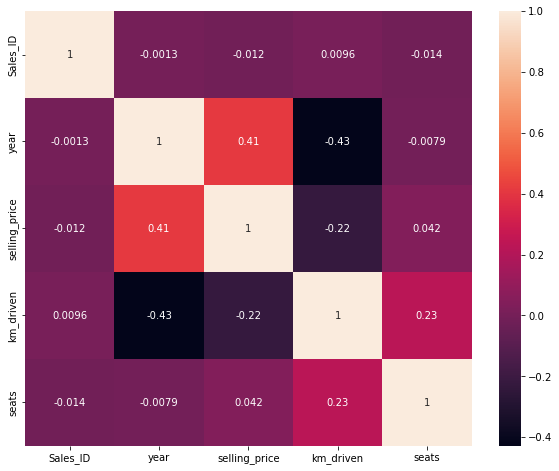

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)



With the help of correlation we found out that in this dataset the other factors which are 
affecting selling price and show positive relationship with each other are--'Sales_ID','name'(0.085367),'year'(0.080545),'km_driven'(0.077578),'City'
(0.099383),'transmission'(0.104687),'sold'(0.101294)




# Task 1.2 (Statistical Analysis using Python)


o Descriptive statistics for both numerical and categorical and draw few insights from them.

### Numerical Analysis

df.info() will give us information about the data type and number of non null values 
in each column

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sales_ID           7906 non-null   int64 
 1   name               7906 non-null   object
 2   year               7906 non-null   int64 
 3   selling_price      7906 non-null   int64 
 4   km_driven          7906 non-null   int64 
 5   Region             7906 non-null   object
 6   State or Province  7906 non-null   object
 7   City               7906 non-null   object
 8   fuel               7906 non-null   object
 9   seller_type        7906 non-null   object
 10  transmission       7906 non-null   object
 11  owner              7906 non-null   object
 12  mileage            7906 non-null   object
 13  engine             7906 non-null   object
 14  max_power          7906 non-null   object
 15  torque             7906 non-null   object
 16  seats              7906 non-null   int64 


df.columns to know the feature names of the dataset.

In [21]:
df.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

df.dtypes will give us information about different data types in the dataset.therefore it would be easy for us to do the calculations and plotting.

In [22]:
df.dtypes

Sales_ID              int64
name                 object
year                  int64
selling_price         int64
km_driven             int64
Region               object
State or Province    object
City                 object
fuel                 object
seller_type          object
transmission         object
owner                object
mileage              object
engine               object
max_power            object
torque               object
seats                 int64
sold                 object
dtype: object

df.describe() is helping us to know the data statistically:  

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_ID,7906.0,4070.106248,2345.770159,1.0,2037.25,4076.5,6102.0,8128.0
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.0,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.0,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.0,2360457.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.0,14.0


df.shape to know the number of rows and columns in the dataset.

In [24]:
df.shape

(7906, 18)

Here we are checking the distribution of the selling price:

/Users/sanjana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

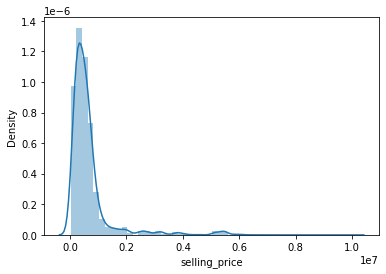

In [129]:
sns.distplot(df.selling_price)

### Categorical Analysis

Here we are checking the distribution of the Region, and we can see that central region appeared most:

<AxesSubplot:xlabel='Region', ylabel='Count'>

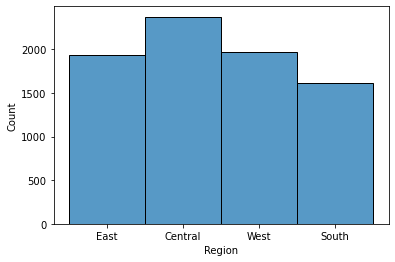

In [128]:
sns.histplot(df.Region)

With respect to selling price and the no of of sold cars we are plotting the graph:

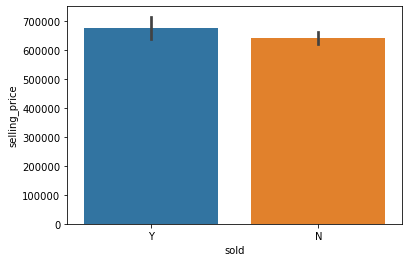

In [25]:
sns.barplot(x = 'sold',
            y = 'selling_price',
            data = df)
 
plt.show()

we are trying to plot the graph to show the sold cars  with respect to year.

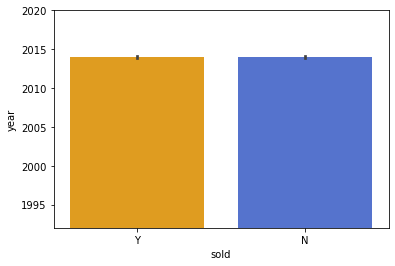

In [120]:
colr=['orange','royalblue']
sns.barplot(x = 'sold',
            y = 'year',
            data = df,palette=colr)
plt.ylim(1992,2020)
plt.show()

With the help of kdeplot we are trying to plot the graph selling_price with respect to region.and we can see that the west region has dominated the selling price of the cars.

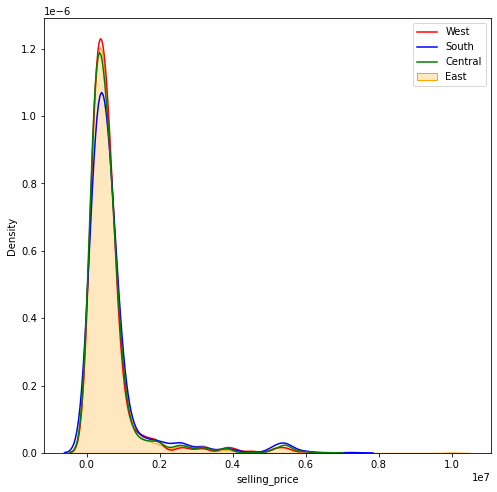

In [124]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df[df['Region']=='West']['selling_price'],color='r',label='West')
sns.kdeplot(data=df[df['Region']=='South']['selling_price'],color='b',label='South')
sns.kdeplot(data=df[df['Region']=='Central']['selling_price'],color='g',label='Central')
sns.kdeplot(data=df[df['Region']=='East']['selling_price'],color='orange',shade=True,label='East')
plt.legend()


we are plotting Region wise selling price and we can clearly see that East region has tp highest
selling price .

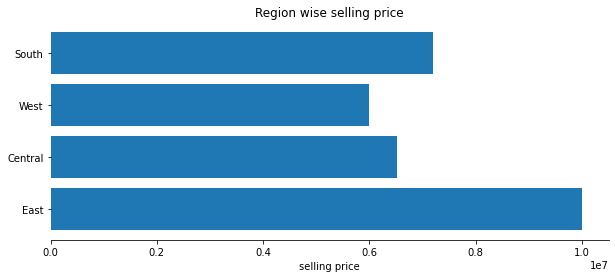

In [29]:
plt.figure(figsize=(10,4))
plt.barh(df['Region'], df['selling_price'])
plt.title('Region wise selling price')
plt.xlabel('selling price')
sns.despine(left=True)
plt.show()

To check the outliers of the selling price with the help of Boxplot

<AxesSubplot:ylabel='selling_price'>

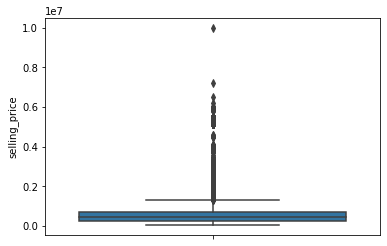

In [30]:
sns.boxplot(y=df.selling_price)

In [32]:
df.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

We are analyzing unique data in some of the features of the given dataset 

In [33]:
print("Categories in 'seller_type' variable: ",end=" ")
print (df['seller_type'].unique()) 
print("\n")

print("Categories in 'fuel' variable: ",end = "")
print(df['fuel'].unique())
print("\n")

print("Categories in 'transmission' variable: ",end =" ")
print(df["transmission"].unique())
print("\n")

print("Categories in 'seats variable: ",end =" ")
print (df['seats'].unique())

Categories in 'seller_type' variable:  ['Individual' 'Dealer' 'Trustmark Dealer']


Categories in 'fuel' variable: ['Diesel' 'Petrol' 'LPG' 'CNG']


Categories in 'transmission' variable:  ['Manual' 'Automatic']


Categories in 'seats variable:  [ 5  4  7  8  6  9 10 14  2]


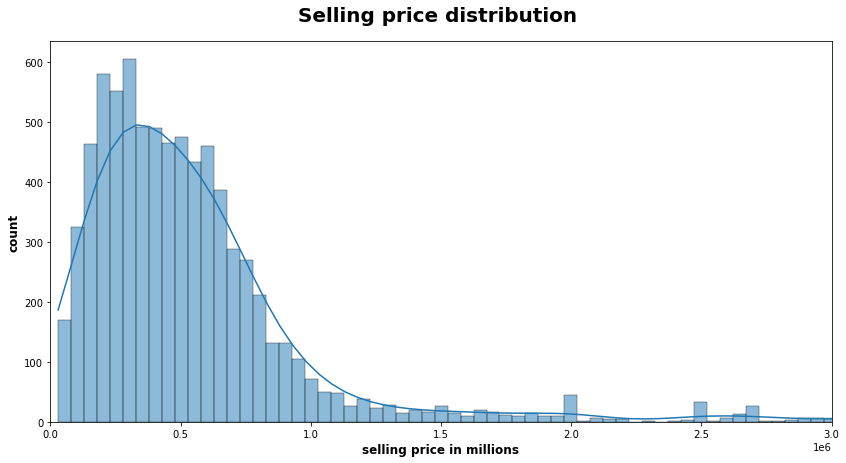

In [34]:
plt.subplots(figsize=(14,7))

sns.histplot(df.selling_price,bins=200,kde=True)
plt.title("Selling price distribution " , weight = 'bold' , fontsize =20 ,pad=20)
plt.ylabel("count", weight = 'bold' ,fontsize = 12)
plt.xlabel("selling price in millions",weight='bold' , fontsize =12)
plt.xlim(0,3000000)
plt.show()

With the help of countplot we are trying to show the top 10 most sold cars, and as we can see its 'Maruti Swift Dzire' 

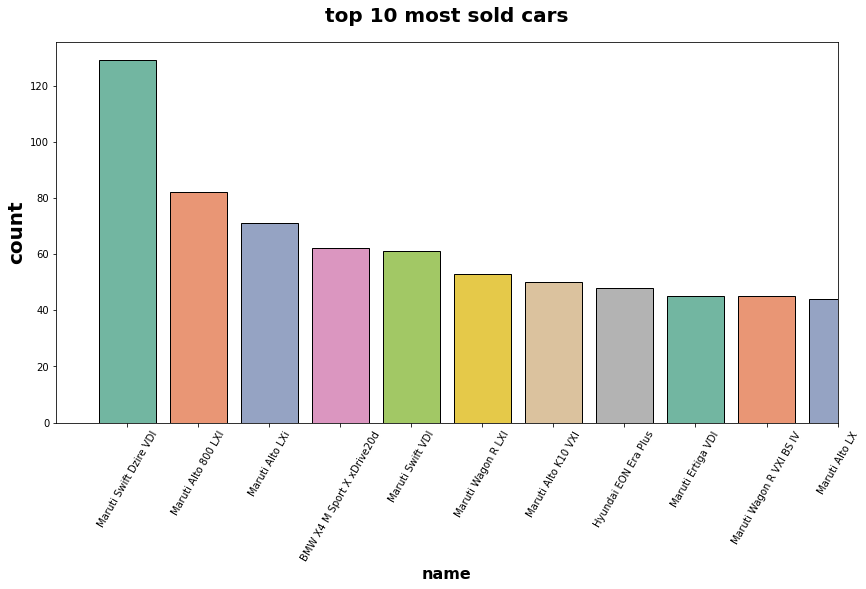

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x='name',data=df,ec='black',palette="Set2",order=df['name'].value_counts().index)
plt.title('top 10 most sold cars',weight='bold',fontsize=20,pad=20)
plt.ylabel('count',weight='bold',fontsize=20)
plt.xlabel('name',weight='bold',fontsize=16)
plt.xticks(rotation=60)
plt.xlim(-1,10,5)
plt.show()

Fuel Type Vs Selling Price to show which fuel type car has the highest selling price,and we can see its 'diesel'

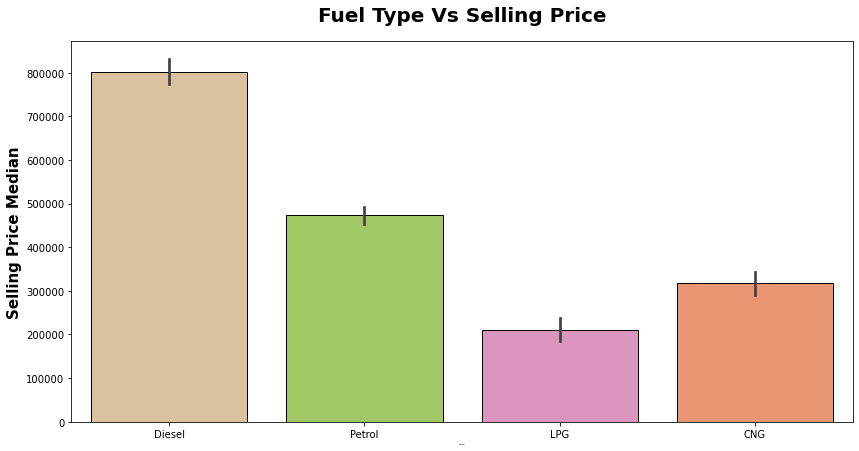

In [36]:
plt.subplots(figsize=(14,7))

sns.barplot(x=df.fuel, y= df.selling_price , ec= "black" , palette="Set2_r")
plt.title('Fuel Type Vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.ylabel('Selling Price Median',weight='bold',fontsize=15)
plt.xlabel('Fuel Type',weight='bold',fontsize=1)
plt.show()

Transmission type vs price to show which type of car has high selling price in the market and , and as we can see its 'Automatic'cars which is dominating the market of used cars

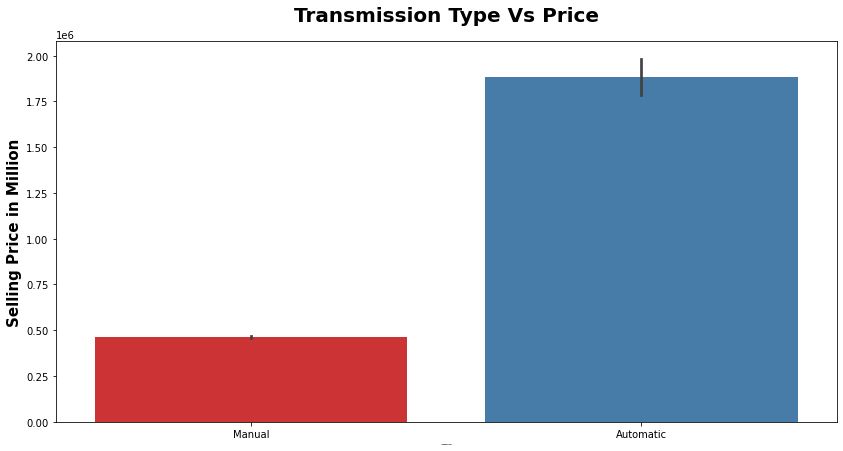

In [37]:
plt.subplots(figsize=(14,7))

sns.barplot(x=df.transmission, y= df.selling_price , palette="Set1")
plt.title('Transmission Type Vs Price',weight='bold',fontsize=20,pad=20)
plt.ylabel('Selling Price in Million',weight='bold',fontsize=15)
plt.xlabel('Transmission Type',weight='bold',fontsize=1)
plt.show()

o Perform relevant hypothesis testing (t, chi-Square, Anova tests)

### T - test

A t-test is a type of inferential statistics which is used to determine if there is
a significant difference between the means of two groups which may be related in certain features.


test the hypothesis :- Is the price of automatic and manual cars are same or different
* first use group by function to check the mean difference
* Null hypothesis :- there is no significant difference in the average price of automatic and manual cars
* alternate hypothesis :- there is significant difference in the average price of automatic and manual cars

In [132]:
df.selling_price.groupby(df.transmission).mean()

transmission
Automatic    1.882972e+06
Manual       4.628191e+05
Name: selling_price, dtype: float64

In [135]:
auto = df[df.transmission=='Automatic']
manual = df[df.transmission=='Manual']

In [136]:
ttest_ind(auto.selling_price,manual.selling_price,equal_var=False)

Ttest_indResult(statistic=27.848139068078265, pvalue=2.899080720554512e-128)

Since p-value greater than 0.05 , Fail to reject null and reject alternate

### Chi Square 

The test is applied when you have two caterogical variables from a single population .
It is used to determine whether there is a significant association between the two variables.

In [40]:
df.head(1)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y


In [41]:
newDf= pd.crosstab(df['transmission'], df['sold'])
newDf

sold,N,Y
transmission,,
Automatic,755,286
Manual,5151,1714


In [42]:
observed_values = newDf.values
print('Observed values :- \n' ,observed_values)

Observed values :- 
 [[ 755  286]
 [5151 1714]]


In [43]:
val = stats.chi2_contingency(newDf)

In [44]:
val

(2.8736035402808486,
 0.09004305248583701,
 1,
 array([[ 777.65570453,  263.34429547],
        [5128.34429547, 1736.65570453]]))

In [45]:
expected_values = val[3]
expected_values

array([[ 777.65570453,  263.34429547],
       [5128.34429547, 1736.65570453]])

In [46]:
no_of_rows = len(newDf.iloc[0:2,0])
no_of_columns = len(newDf.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom :-", ddof)
alpha = 0.05

Degree of freedom :- 1


In [47]:
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [48]:
print("chi square statistic: ", chi_square_statistic)

chi square statistic:  3.004767441403118


In [49]:
critical_value = chi2.ppf(q=1-alpha,df=ddof)
print("critical value: " , critical_value)

critical value:  3.841458820694124


In [50]:
# p value
p_value = 1-chi2.cdf(x=chi_square_statistic , df=ddof)
print('p value: ', p_value)
print('significance level: ', alpha)
print('Degree of freedom: ',ddof)


p value:  0.08301989033593771
significance level:  0.05
Degree of freedom:  1


In [51]:
if chi_square_statistic>=critical_value:
    print("Reject H0, there is a relationship between two categorical values")
else:
    print("Retain H0, there is no relationship between two categorical values")
    
if p_value<=alpha:
    print("Reject H0, there is a relationship between two categorical values")
else:
    print("Retain H0, there is no relationship between two categorical values")

Retain H0, there is no relationship between two categorical values
Retain H0, there is no relationship between two categorical values


# TASK 1.3 (Exploratory Data Analysis)

● Univariate, Bi- Variate Analysis and Multi- Variate Analysis

Univariate Analysis--Univariate Analysis means taking one column at a time and analyzing it.
like here we have tried to show 'sales_id','year','selling_price','km_driven','seats'

In [52]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

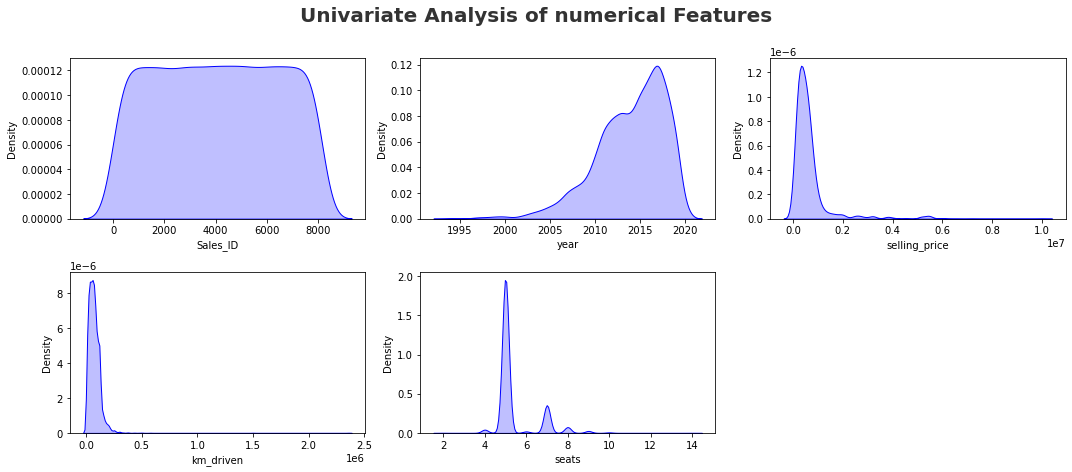

In [53]:
plt.figure(figsize=(15,15))

plt.suptitle("Univariate Analysis of numerical Features",fontsize=20,fontweight="bold",
             alpha=0.8,y=1.)


for i in range(len(numeric_features)): 
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color ="b") 
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Bi-variate Analysis--

Here we can see that bi-variate analysis of two features i.e., selling_price and km_driven, the sold value "no" has more impact on the data than "yes" along with the most km driven cars has no sold case.

/Users/sanjana/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


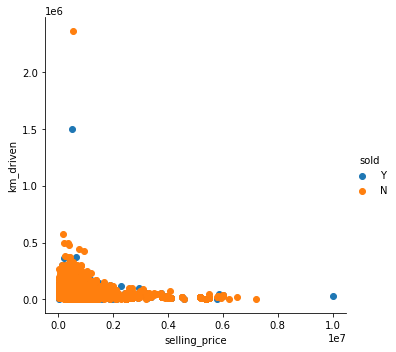

In [98]:
sns.FacetGrid(df,hue="sold",size=5).map(plt.scatter,"selling_price","km_driven").
add_legend();
plt.show()

In [ ]:
Multi- Variate Analysis--

According to the below graph we can analyse that with increasing year the selling price of the used cars is also increasing.

/Users/sanjana/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


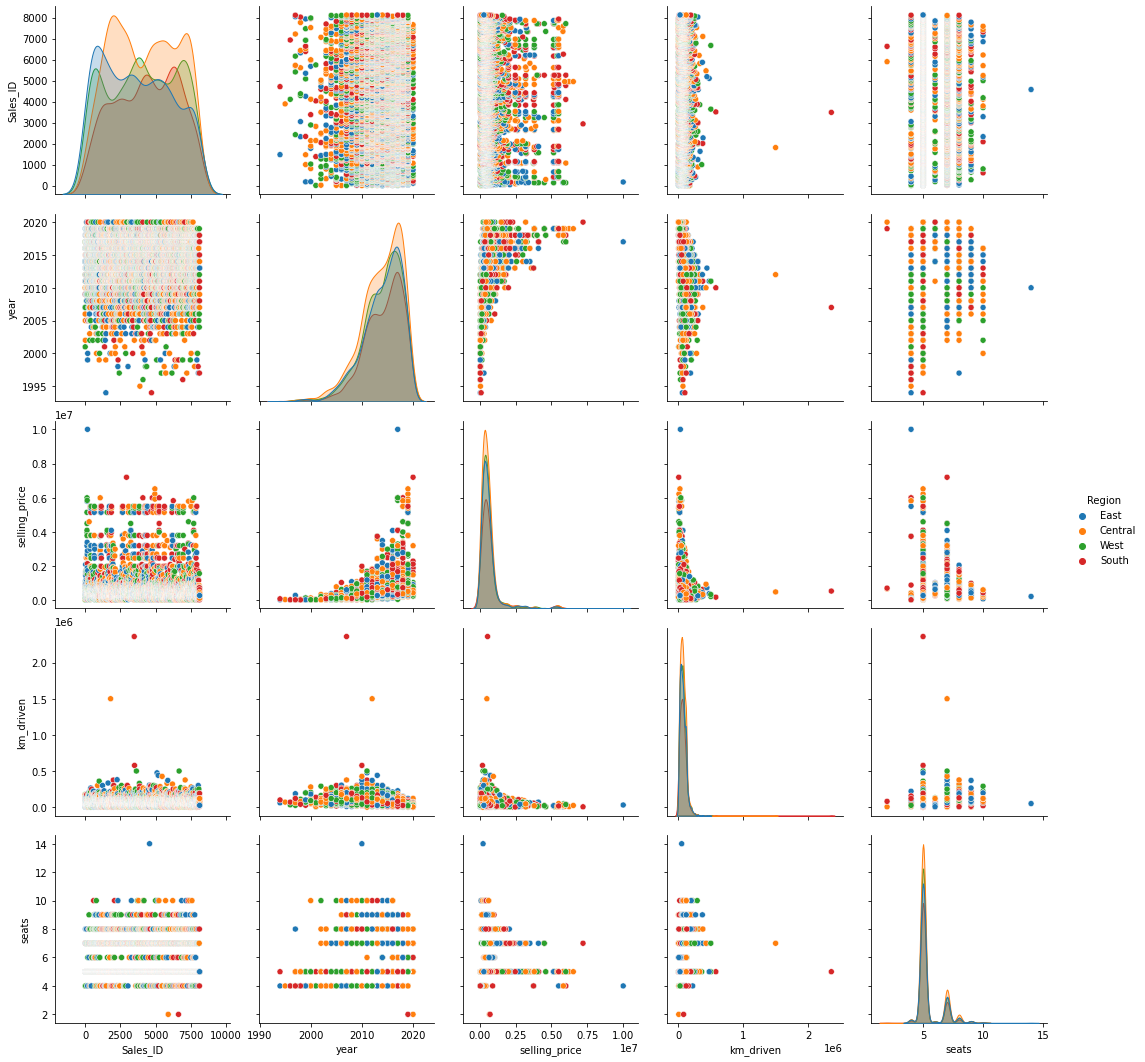

In [99]:
sns.pairplot(df,hue="Region",size=3)

● Missing values identification and treatment

df.isnull().sum() helps us to find id there are any missing values in the dataset.

In [54]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

Duplicated help us to know if there are any duplicate values in the dataset.

In [55]:
df.loc[df.duplicated()]

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold


In [56]:
import missingno as ms

<AxesSubplot:>

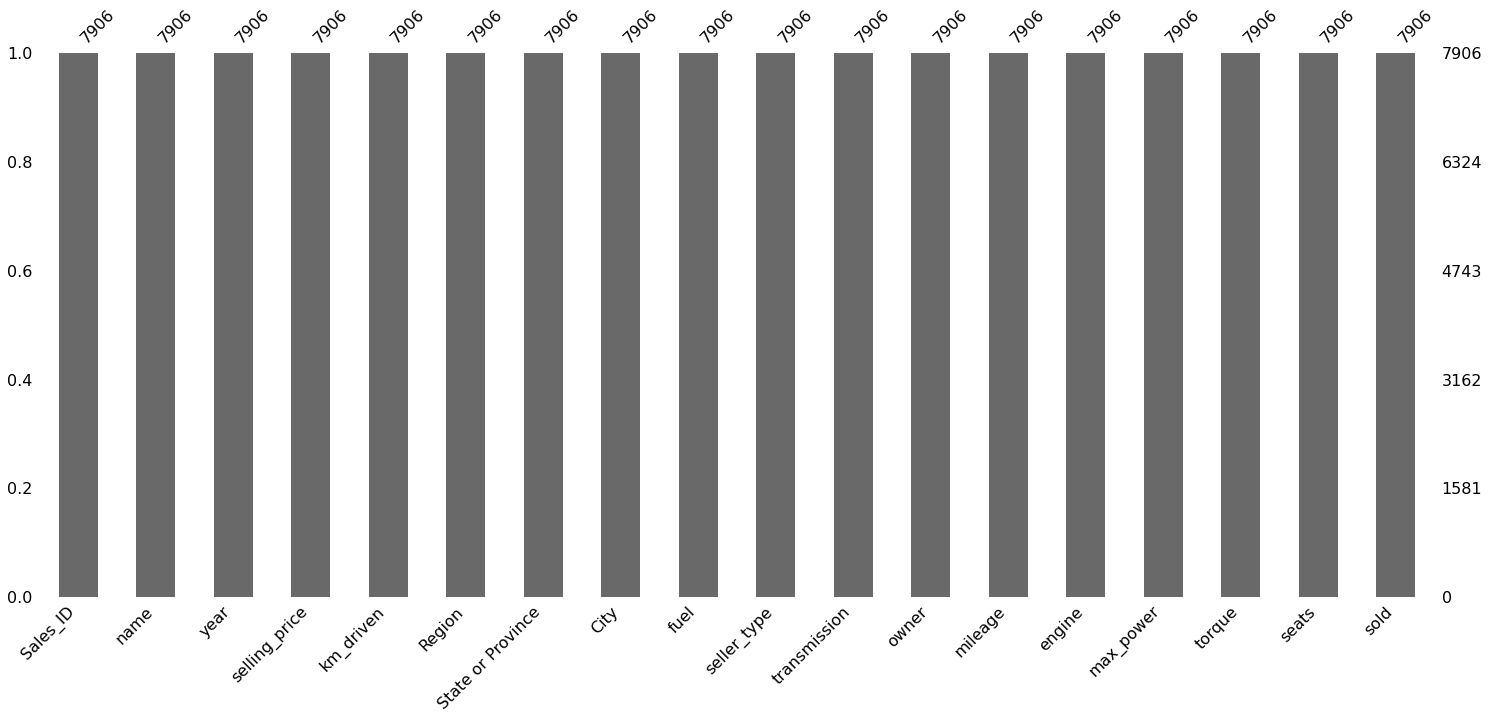

In [57]:
ms.bar(df)

<AxesSubplot:>

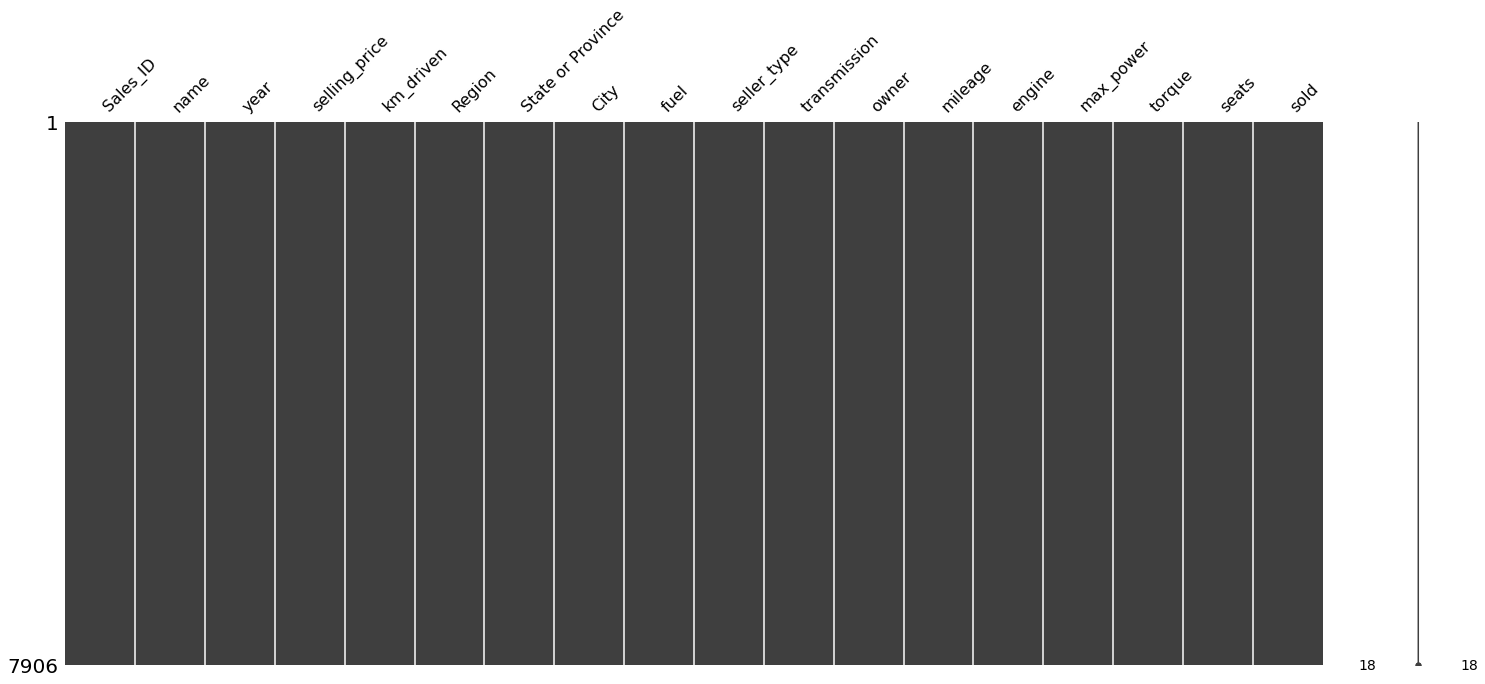

In [58]:
ms.matrix(df)

we can infer from the above calculations and graph that there are no missing values in this 
dataset.The no of rows and columns does not change after the plot and has the same no of rows nd columns which is(7906,18) hence this dataset does not have any missing values.

● Outlier analysis and treatment

Finding outliers for "selling_price" using IQR Method


In [59]:
df1=df.copy()

In [60]:
IQR=df1['selling_price'].quantile(0.75)-df1['selling_price'].quantile(0.25)
upper=df1['selling_price'].quantile(0.75)+(1.5*IQR)
lower=df1['selling_price'].quantile(0.25)-(1.5*IQR)
df1[(df1['selling_price']>upper) | (df1['selling_price']<lower)].shape[0]

598

With the help of Boxplot we are trying to show the outliers:

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef108c7640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef108c7d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef108c73a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef108cc4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef108cc730>],
 'means': []}

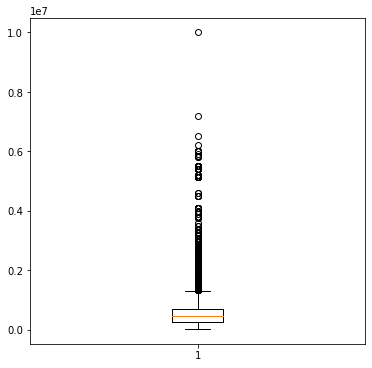

In [61]:
plt.figure(figsize=(6,6))
plt.boxplot(df['selling_price'])

Finding outliers for "km_driven" using IQR Method

In [62]:
IQR1=df1['km_driven'].quantile(0.75)-df1['km_driven'].quantile(0.25)
upper1=df1['km_driven'].quantile(0.75)+(1.5*IQR1)
lower1=df1['km_driven'].quantile(0.25)-(1.5*IQR1)
df1[(df1['km_driven']>upper1) | (df1['km_driven']<lower1)].shape[0
                                                                ]

194

Boxplot to show the outliers in the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef24d32a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef24d260d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef24d326a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef24d26640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef24d26910>],
 'means': []}

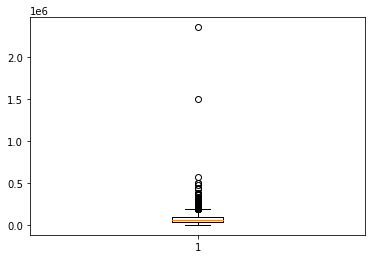

In [63]:
plt.boxplot(df1['km_driven'])

Capping of Outliers:

In [64]:
max1=df1['selling_price'].quantile(0.75)+(1.5*IQR)
min1=df1['selling_price'].quantile(0.25)-(1.5*IQR)

In [65]:
df1['selling_price']=np.clip(df1['selling_price'],min1,max1)

In [66]:
df1[(df1['selling_price']>upper) | (df1['selling_price']<lower)].shape[0]

0

In [67]:
max2=df1['km_driven'].quantile(0.95)
min2=df1['km_driven'].quantile(0.01)

In [68]:
df1['km_driven']=np.clip(df1['km_driven'],min2,max2)

In [69]:
df1[(df1['km_driven']>upper1) | (df1['km_driven']<lower1)].shape[0]

0

Here from the above calculations we can infer that the outliers has been removed. 

 ● Data transformation

With the help of histplot we can see the outliers in the data and hence normalizing the data 

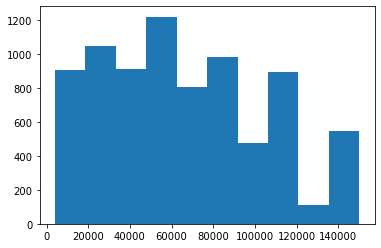

In [70]:
plt.hist(df1['km_driven']);

The plot is right skewed because of the outliers in the km_driven.

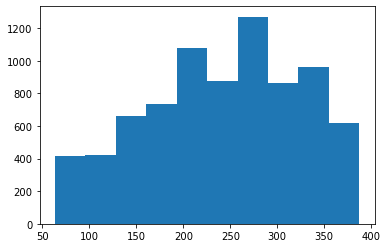

In [71]:
df1['km_driven_sqrt']=np.sqrt(df1['km_driven'])
plt.hist(df1['km_driven_sqrt']);

The plot has shifted towards normal distribution.

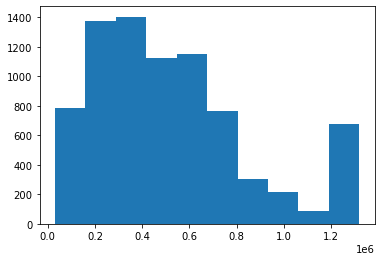

In [72]:
plt.hist(df1['selling_price']);

Here the 'selling_price' is rightly skewed because of the outliers in the data.

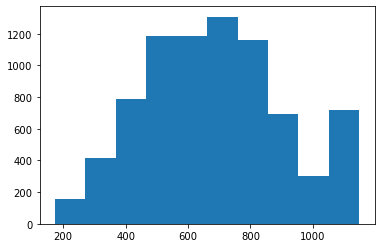

In [73]:
df1['selling_price_sqrt']=np.sqrt(df1['selling_price'])
plt.hist(df1['selling_price_sqrt']);

In [ ]:
The plot has shifted towards normal distribution.

● Data scaling using min-max and/or Z-score normalisation

For scaling we are changing categorical feature to numerical feature with the help of
label encoding and one hot encoding:

In [74]:
df3=df.copy()

In [75]:
le=LabelEncoder()

In [76]:
df3['year']=le.fit_transform(df3['year'])
df3['State or Province']=le.fit_transform(df3['State or Province'])
df3['fuel']=le.fit_transform(df3['fuel'])
df3['seller_type']=le.fit_transform(df3['seller_type'])
df3['transmission']=le.fit_transform(df3['transmission'])
df3['owner']=le.fit_transform(df3['owner'])
df3['seats']=le.fit_transform(df3['seats'])
df3['name']=le.fit_transform(df3['State or Province'])
df3['City']=le.fit_transform(df3['fuel'])
df3['mileage']=le.fit_transform(df3['seller_type'])
df3['max_power']=le.fit_transform(df3['transmission'])
df3['engine']=le.fit_transform(df3['owner'])
df3['torque']=le.fit_transform(df3['seats'])

In [77]:
df3.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,7,20,450000,145500,East,7,1,1,1,1,0,1,0,1,2,2,Y
1,2,30,20,370000,120000,East,30,1,1,1,1,2,1,2,1,2,2,Y
2,3,11,12,158000,140000,Central,11,3,3,1,1,4,1,4,1,2,2,Y
3,4,11,16,225000,127000,Central,11,1,1,1,1,0,1,0,1,2,2,Y
4,5,30,13,130000,120000,East,30,3,3,1,1,0,1,0,1,2,2,Y


In [78]:

df3=pd.get_dummies(columns=['Region','sold'],data=df3,drop_first=True)
df3.head()

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Region_East,Region_South,Region_West,sold_Y
0,1,7,20,450000,145500,7,1,1,1,1,0,1,0,1,2,2,1,0,0,1
1,2,30,20,370000,120000,30,1,1,1,1,2,1,2,1,2,2,1,0,0,1
2,3,11,12,158000,140000,11,3,3,1,1,4,1,4,1,2,2,0,0,0,1
3,4,11,16,225000,127000,11,1,1,1,1,0,1,0,1,2,2,0,0,0,1
4,5,30,13,130000,120000,30,3,3,1,1,0,1,0,1,2,2,1,0,0,1


now are trying to scale the features with minmax scaler:

In [79]:
minmax=MinMaxScaler()

In [80]:
for i in df3.columns:
    df3[i]=minmax.fit_transform(df3[i].values.reshape(-1,1))
df3.head()    
    

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Region_East,Region_South,Region_West,sold_Y
0,0.000000,0.145833,0.769231,0.042126,0.061640,0.145833,0.333333,0.333333,0.5,1.0,0.0,0.5,0.0,1.0,0.25,0.25,1.0,0.0,0.0,1.0
1,0.000123,0.625000,0.769231,0.034102,0.050837,0.625000,0.333333,0.333333,0.5,1.0,0.5,0.5,0.5,1.0,0.25,0.25,1.0,0.0,0.0,1.0
2,0.000246,0.229167,0.461538,0.012839,0.059310,0.229167,1.000000,1.000000,0.5,1.0,1.0,0.5,1.0,1.0,0.25,0.25,0.0,0.0,0.0,1.0
3,0.000369,0.229167,0.615385,0.019559,0.053803,0.229167,0.333333,0.333333,0.5,1.0,0.0,0.5,0.0,1.0,0.25,0.25,0.0,0.0,0.0,1.0
4,0.000492,0.625000,0.500000,0.010030,0.050837,0.625000,1.000000,1.000000,0.5,1.0,0.0,0.5,0.0,1.0,0.25,0.25,1.0,0.0,0.0,1.0


● Feature Engineering

In this section, we are doing feature enginering as we dont always drop the columns so we have to extract the
information from the features so we used to do the feature extraction and if required we drop the feature.

There are 5 steps involved ih the process :-
    
    1- Standardize the data
    2- Covariance matrix computation
    3- Clculate eigen value and eigen vectors from the covariance matrix
    4- select the feature vector that has eigen vector we decided to keep
    5 Feature vetor . T*Standard data.T

In [81]:
sc = StandardScaler()

In [82]:
df3=pd.DataFrame(sc.fit_transform(df3),columns=df3.columns)
df3.head(1)

,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Region_East,Region_South,Region_West,sold_Y
0,-1.734767,-1.028573,0.004158,-0.245613,1.343777,-1.028573,-0.887058,-0.887058,0.277395,0.389408,-0.655358,0.277395,-0.655358,0.389408,-0.435621,-0.435621,1.75424,-0.506671,-0.577253,1.71843


In [83]:
pca= PCA()

In [84]:
pca_fit= pca.fit_transform(df3)

In [85]:
pca.components_[0]

array([ 8.33562563e-03, -1.41219301e-02, -3.23598938e-01, -3.69806452e-01,
        2.63761925e-01, -1.41219301e-02, -2.49576986e-02, -2.49576986e-02,
        2.95955682e-01,  3.75665274e-01,  3.21616950e-01,  2.95955682e-01,
        3.21616950e-01,  3.75665274e-01,  1.05292244e-01,  1.05292244e-01,
       -2.07909831e-04, -2.32620646e-02,  1.12138297e-02, -9.96825922e-03])

In [86]:
pca.explained_variance_ratio_

array([1.80082323e-01, 1.42566889e-01, 1.11497138e-01, 9.71570204e-02,
       9.04023394e-02, 8.02167576e-02, 6.36438653e-02, 6.17565603e-02,
       5.41069982e-02, 4.31894425e-02, 2.43214299e-02, 1.94843742e-02,
       1.92963590e-02, 1.22785031e-02, 5.27303291e-33, 2.60364833e-33,
       6.17354999e-34, 2.53884591e-34, 6.24832986e-35, 5.50560951e-36])

In [87]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18008232, 0.32264921, 0.43414635, 0.53130337, 0.62170571,
       0.70192247, 0.76556633, 0.82732289, 0.88142989, 0.92461933,
       0.94894076, 0.96842514, 0.9877215 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

<BarContainer object of 20 artists>

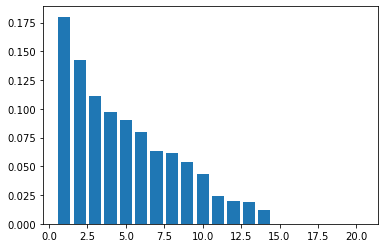

In [88]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

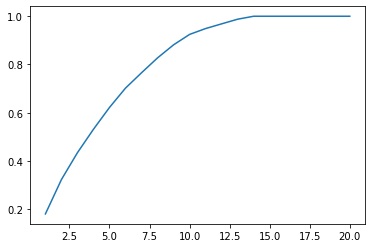

In [89]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))

In [90]:
pca2 = PCA(n_components=10)

In [91]:
pca_fit2=pca2.fit_transform(df3)

In [92]:
final=pd.DataFrame(pca_fit2,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
final.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,0.434092,0.537857,-0.271707,-1.055717,2.373237,-1.433040,0.615415,-1.571297,1.685900,1.236884
1,1.374020,0.460019,1.442256,0.853477,2.466820,-0.913511,0.398110,-1.502186,0.853932,-0.249938
2,3.238321,-1.491399,-1.206489,2.734023,2.820402,-0.325212,0.322981,0.731062,-0.034723,0.158852
3,0.778149,0.411435,-0.678952,-0.784218,1.979587,-1.396112,0.771024,-1.349023,-0.197329,1.449649
4,0.902755,-1.682798,1.739438,-0.374920,2.400998,-1.035038,0.017576,0.321026,0.709264,1.988409


<AxesSubplot:>

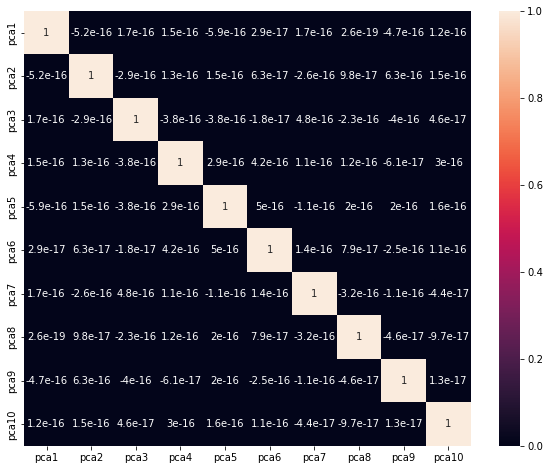

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(final.corr(),annot=True)

we have extracted the informations from the features using pca.

# REPORT:

* The datatypes and Column names were right and there were 7906 rows and 18 columns

* The selling_price column is the target to predict. i.e Regression Problem.

* There are outliers in the km_driven and selling_price.

* Skewness is found in a few of the columns that we handled.

* Automatic cars has a higher selling price than manual cars.

* Diesel is the most preferred choice of fuel on the used car data, followed by petrol and LPG.